# Major Leagues

## Introduction

The datasets used in this project (linked below) contain detailed NFL data ranging from 1920 to 2018 seasons. The purpose of this project is to use regression models to predict the target variable--Score of the game. I used the Linear Regression and Random Forest models to predict the score of a team for a given game. 

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sn
from sklearn import linear_model

from sklearn.ensemble import RandomForestRegressor

## Data

I chose to work with the NFL Elo data. I was able to find two separate datasets containing similar information about all NFL games dating back to the 1920s. I combined these two datasets to form a more robust dataset with more attributes to work with. The first dataset labeled dfFoot is imported first, followed by the second, labeled dfFoot2. Since there were repeat variables in each dataset, these were dropped so that the merge wouldn't create duplicate columns in the final dataset.

The data is comprised of many variations of the Elo rating. The Elo rating is: "a measure of strength based on head-to-head results and quality of opponent." The descriptions of each of the Elo variables can be found in the README file.

It is important to note that each observation in these datasets is a game played on a specific day. The teams, results of the game, scores of the game, and team statistics are also part of each observation. The organization of the observations will allow us to use various features to predict the scores for each team.

In [141]:
dfFoot=pd.read_csv("/Users/anissakhan/Dropbox/Nissa_stuff/KU_CS/EECS731/731-Project-4-Khan/Data/RawData/nfl_games.csv")
dfFoot.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
0,1920-09-26,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0
1,1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0
2,1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0
3,1920-10-03,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0
4,1920-10-03,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0


Since dfFoot2 contains the elo1, elo2, score1, and score2 variables, I drop them from dfFoot so the merge doesn't duplicate these features. elo1 and elo2 are called elo1_pre and elo2_pre in the final dataset. They are the Elo ratings of the teams prior to gameplay. The Elo ratings are updated after gameplay and are called elo1_post and elo2_post in the final dataset.

In [142]:
dfFoot=dfFoot.drop(columns='elo1')
dfFoot=dfFoot.drop(columns='elo2')
dfFoot=dfFoot.drop(columns='score1')
dfFoot=dfFoot.drop(columns='score2')
dfFoot.head()

,date,season,neutral,playoff,team1,team2,elo_prob1,result1
0,1920-09-26,1920,0,0,RII,STP,0.824651,1.0
1,1920-10-03,1920,0,0,AKR,WHE,0.824212,1.0
2,1920-10-03,1920,0,0,RCH,ABU,0.824212,1.0
3,1920-10-03,1920,0,0,DAY,COL,0.575819,1.0
4,1920-10-03,1920,0,0,RII,MUN,0.644171,1.0


The second dataset dfFoot2 is uploaded here. This dataset contains the most variations on the Elo rating. I drop the playoff feature from dfFoot2 because it is already in dfFoot1. 

In [143]:
dfFoot2=pd.read_csv("/Users/anissakhan/Dropbox/Nissa_stuff/KU_CS/EECS731/731-Project-4-Khan/Data/RawData/nfl_elo.csv")
dfFoot2.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
0,1920-09-26,1920,0,NaN,RII,STP,1503.947,1300.000,0.824651,0.175349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.0
1,1920-10-03,1920,0,NaN,AKR,WHE,1503.420,1300.000,0.824212,0.175788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,0.0
2,1920-10-03,1920,0,NaN,RII,MUN,1516.108,1478.004,0.644171,0.355829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.0
3,1920-10-03,1920,0,NaN,DAY,COL,1493.002,1504.908,0.575819,0.424181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
4,1920-10-03,1920,0,NaN,RCH,ABU,1503.420,1300.000,0.824212,0.175788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0


In [144]:
dfFoot2=dfFoot2.drop(columns='playoff')
dfFoot2.head()

,date,season,neutral,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
0,1920-09-26,1920,0,RII,STP,1503.947,1300.000,0.824651,0.175349,1516.108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.0
1,1920-10-03,1920,0,AKR,WHE,1503.420,1300.000,0.824212,0.175788,1515.278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,0.0
2,1920-10-03,1920,0,RII,MUN,1516.108,1478.004,0.644171,0.355829,1542.135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.0
3,1920-10-03,1920,0,DAY,COL,1493.002,1504.908,0.575819,0.424181,1515.434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
4,1920-10-03,1920,0,RCH,ABU,1503.420,1300.000,0.824212,0.175788,1510.934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0


### Merging

Here dfFoot and dfFoot2 are merged to create a single dataset called dfAll.

In [145]:
dfAll=pd.merge(dfFoot, dfFoot2, left_on=['date', 'team1', 'team2', 'neutral', 'season', 'elo_prob1'], right_on=['date', 'team1', 'team2', 'neutral', 'season', 'elo_prob1'])
dfAll

,date,season,neutral,playoff,team1,team2,elo_prob1,result1,elo1_pre,elo2_pre,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
0,1920-09-26,1920,0,0,RII,STP,0.824651,1.0,1503.947000,1300.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.0
1,1920-10-03,1920,0,0,AKR,WHE,0.824212,1.0,1503.420000,1300.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,0.0
2,1920-10-03,1920,0,0,RCH,ABU,0.824212,1.0,1503.420000,1300.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,0.0
3,1920-10-03,1920,0,0,DAY,COL,0.575819,1.0,1493.002000,1504.908000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
4,1920-10-03,1920,0,0,RII,MUN,0.644171,1.0,1516.108000,1478.004000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16261,2019-01-13,2018,0,1,NE,LAC,0.582068,1.0,1640.171960,1647.624483,...,0.674251,0.325749,364.965112,168.815622,233.039347,167.622048,1656.246942,1622.084055,41.0,28.0
16262,2019-01-13,2018,0,1,NO,PHI,0.641378,1.0,1669.105861,1633.114673,...,0.717901,0.282099,211.701387,109.954117,232.160805,176.540866,1659.143400,1599.382896,20.0,14.0
16263,2019-01-20,2018,0,1,NO,LAR,0.638772,0.0,1682.450194,1648.424105,...,0.634698,0.365302,154.365034,179.912314,224.381228,175.160616,1640.743194,1657.938921,23.0,26.0
16264,2019-01-20,2018,0,1,KC,NE,0.611248,0.0,1675.286412,1661.668566,...,0.615809,0.384191,187.826168,198.704277,243.173807,229.605840,1618.987574,1681.140535,31.0,37.0


### Cleaning

Before moving forward, I convert all object types to string types in case these values are needed for comparison moving forward. String variables cannot be used in the regressions, so this is simply for data consistency and cleanliness. 

In [146]:
dfAll.dtypes

date               object
season              int64
neutral             int64
playoff             int64
team1              object
team2              object
elo_prob1         float64
result1           float64
elo1_pre          float64
elo2_pre          float64
elo_prob2         float64
elo1_post         float64
elo2_post         float64
qbelo1_pre        float64
qbelo2_pre        float64
qb1                object
qb2                object
qb1_value_pre     float64
qb2_value_pre     float64
qb1_adj           float64
qb2_adj           float64
qbelo_prob1       float64
qbelo_prob2       float64
qb1_game_value    float64
qb2_game_value    float64
qb1_value_post    float64
qb2_value_post    float64
qbelo1_post       float64
qbelo2_post       float64
score1            float64
score2            float64
dtype: object

In [147]:
dfAll['team1'] = dfAll['team1'].astype("string")
dfAll['team2'] = dfAll['team2'].astype("string")
dfAll['qb1'] = dfAll['qb1'].astype("string")
dfAll['qb2'] = dfAll['qb2'].astype("string")
dfAll['date'] = dfAll['date'].astype("string")

In case they are needed, I split the date variable into three separate fields: Year, month, and day that the game was played.

In [148]:
new = dfAll["date"].str.split("-", n = 1, expand = True)
dfAll["year"]=new[0]
dfAll["month"]=new[1]

In [149]:
new = dfAll["month"].str.split("-", n = 1, expand = True)
dfAll["month"]=new[0]
dfAll["day"]=new[1]
dfAll.head()

,date,season,neutral,playoff,team1,team2,elo_prob1,result1,elo1_pre,elo2_pre,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,year,month,day
0,1920-09-26,1920,0,0,RII,STP,0.824651,1.0,1503.947,1300.000,...,NaN,NaN,NaN,NaN,NaN,48.0,0.0,1920,09,26
1,1920-10-03,1920,0,0,AKR,WHE,0.824212,1.0,1503.420,1300.000,...,NaN,NaN,NaN,NaN,NaN,43.0,0.0,1920,10,03
2,1920-10-03,1920,0,0,RCH,ABU,0.824212,1.0,1503.420,1300.000,...,NaN,NaN,NaN,NaN,NaN,10.0,0.0,1920,10,03
3,1920-10-03,1920,0,0,DAY,COL,0.575819,1.0,1493.002,1504.908,...,NaN,NaN,NaN,NaN,NaN,14.0,0.0,1920,10,03
4,1920-10-03,1920,0,0,RII,MUN,0.644171,1.0,1516.108,1478.004,...,NaN,NaN,NaN,NaN,NaN,45.0,0.0,1920,10,03


Now I need to check for missing values. It can be seen from the head of dfAll that there are NaN values. Prior to 1950, the more detailed adjusted Elo ratings were not available. From the info table below, we can see this includes the variables labeled 13 to 28. As will be discussed later, one of our primary independent variables are the quarterback Elo ratings (qb_game_value). Since this is one of the variables that is missing prior to 1950, we will drop these observations from the data. The result of dropping these observations is: in our regression analysis we cannot say anything about the data prior to 1950.

In [150]:
dfAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16266 entries, 0 to 16265
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            16266 non-null  string 
 1   season          16266 non-null  int64  
 2   neutral         16266 non-null  int64  
 3   playoff         16266 non-null  int64  
 4   team1           16266 non-null  string 
 5   team2           16266 non-null  string 
 6   elo_prob1       16266 non-null  float64
 7   result1         16266 non-null  float64
 8   elo1_pre        16266 non-null  float64
 9   elo2_pre        16266 non-null  float64
 10  elo_prob2       16266 non-null  float64
 11  elo1_post       16266 non-null  float64
 12  elo2_post       16266 non-null  float64
 13  qbelo1_pre      14105 non-null  float64
 14  qbelo2_pre      14105 non-null  float64
 15  qb1             14105 non-null  string 
 16  qb2             14105 non-null  string 
 17  qb1_value_pre   14105 non-null 

We can now see there are no more missing values:

In [151]:
dfAll.dropna(subset = ["qbelo1_pre"], inplace=True)
dfAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14105 entries, 2161 to 16265
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            14105 non-null  string 
 1   season          14105 non-null  int64  
 2   neutral         14105 non-null  int64  
 3   playoff         14105 non-null  int64  
 4   team1           14105 non-null  string 
 5   team2           14105 non-null  string 
 6   elo_prob1       14105 non-null  float64
 7   result1         14105 non-null  float64
 8   elo1_pre        14105 non-null  float64
 9   elo2_pre        14105 non-null  float64
 10  elo_prob2       14105 non-null  float64
 11  elo1_post       14105 non-null  float64
 12  elo2_post       14105 non-null  float64
 13  qbelo1_pre      14105 non-null  float64
 14  qbelo2_pre      14105 non-null  float64
 15  qb1             14105 non-null  string 
 16  qb2             14105 non-null  string 
 17  qb1_value_pre   14105 non-nu

Since we dropped a number of observations, we will reset the index so any subsequent for loops will run appropriately. We can see below the indexing now begins at 0 and the observations before 1950 are gone.

In [152]:
dfAll=dfAll.reset_index()
dfAll.head()

,index,date,season,neutral,playoff,team1,team2,elo_prob1,result1,elo1_pre,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,year,month,day
0,2161,1950-09-16,1950,0,0,PHI,CLE,0.629402,0.0,1674.314,...,275.22,-12.309,27.522,1630.613026,1685.827280,10.0,35.0,1950,09,16
1,2162,1950-09-17,1950,0,0,PIT,NYG,0.625529,0.0,1485.849,...,-54.12,-3.498,-5.412,1454.118729,1493.988602,7.0,18.0,1950,09,17
2,2163,1950-09-17,1950,0,0,LAR,CHI,0.501321,0.0,1564.606,...,-30.03,-1.221,-3.003,1549.226817,1643.798965,20.0,24.0,1950,09,17
3,2164,1950-09-17,1950,0,0,BCL,WSH,0.425851,0.0,1337.541,...,251.79,0.363,25.179,1310.867671,1481.487455,14.0,38.0,1950,09,17
4,2165,1950-09-17,1950,0,0,SF,NYY,0.871695,0.0,1589.774,...,28.05,1.056,2.805,1557.813303,1355.019109,17.0,21.0,1950,09,17


For the regression, I create a new feature called qb1EloSquared which is simply the value of (qb1_game_value)^2. Since qb1_game_value is one of my primary independent variables (again to be discussed later), I create a squared version of it to capture any quadratic behavior in the regression prediction.

The error I get when creating this variable is telling me I might be changing a copy of dfAll instead of changing dfAll itself. After a visual check of the dataframe, I conclude that this warning is sent as a precaution but in this case is incorrect, because the qb1EloSquared variable is indeed added to my dfAll.

In [153]:
dfAll['qb1EloSquared'] = dfAll['qb1_game_value']

for i in range(0,len(dfAll['qb1_game_value'])):
    dfAll['qb1EloSquared'][i]=(dfAll['qb1_game_value'][i])**2

    
dfAll.head()

<ipython-input-153-e4afd12e1390>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAll['qb1EloSquared'][i]=(dfAll['qb1_game_value'][i])**2


,index,date,season,neutral,playoff,team1,team2,elo_prob1,result1,elo1_pre,...,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,year,month,day,qb1EloSquared
0,2161,1950-09-16,1950,0,0,PHI,CLE,0.629402,0.0,1674.314,...,-12.309,27.522,1630.613026,1685.827280,10.0,35.0,1950,09,16,15151.1481
1,2162,1950-09-17,1950,0,0,PIT,NYG,0.625529,0.0,1485.849,...,-3.498,-5.412,1454.118729,1493.988602,7.0,18.0,1950,09,17,1223.6004
2,2163,1950-09-17,1950,0,0,LAR,CHI,0.501321,0.0,1564.606,...,-1.221,-3.003,1549.226817,1643.798965,20.0,24.0,1950,09,17,149.0841
3,2164,1950-09-17,1950,0,0,BCL,WSH,0.425851,0.0,1337.541,...,0.363,25.179,1310.867671,1481.487455,14.0,38.0,1950,09,17,13.1769
4,2165,1950-09-17,1950,0,0,SF,NYY,0.871695,0.0,1589.774,...,1.056,2.805,1557.813303,1355.019109,17.0,21.0,1950,09,17,111.5136


In [154]:
#dfAll.to_csv('FinalData_All.csv')

In addition to predicting scores for all of the observations via regression, I also want to predict the scores for a single team to see if the scores for all teams are consistent with the scores for single teams. I choose the Kansas City Chiefs to do this with. The dfKC dataset contains all observations where KC is either team1 (home team) or team2 (away team). 

In [155]:
dfKC=dfAll.query("team1 == 'KC' or team2 == 'KC'")[['season', 'neutral', 'playoff', 'team1', 'team2', 'elo_prob1', 'elo_prob2', 'result1', 'elo1_pre', 'elo2_pre', 'elo1_post', 'elo2_post', 'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre', 'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2', 'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post', 'qbelo1_post', 'qbelo2_post', 'score1', 'score2', 'year', 'month', 'day', 'qb1EloSquared']]

In [156]:
dfKC

,season,neutral,playoff,team1,team2,elo_prob1,elo_prob2,result1,elo1_pre,elo2_pre,...,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,year,month,day,qb1EloSquared
742,1960,0,0,LAC,KC,0.592466,0.407534,1.0,1300.000000,1300.000000,...,31.614000,11.872908,1305.532159,1294.467841,21.0,20.0,1960,09,10,99944.499600
745,1960,0,0,OAK,KC,0.552525,0.447475,0.0,1266.146000,1294.513000,...,3.620474,29.231991,1237.400627,1327.815491,16.0,34.0,1960,09,16,9265.459514
753,1960,0,0,KC,LAC,0.645457,0.354543,1.0,1327.601000,1288.522000,...,24.814603,33.270328,1349.269932,1269.050479,17.0,0.0,1960,09,25,223.260023
765,1960,0,0,KC,NYJ,0.632338,0.367662,0.0,1347.170000,1317.970000,...,50.155286,72.762631,1335.541105,1334.409934,35.0,37.0,1960,10,02,77407.163377
769,1960,0,0,KC,OAK,0.726680,0.273320,0.0,1332.655000,1227.786000,...,44.252783,20.337232,1324.428886,1244.606640,19.0,20.0,1960,10,09,78.672246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14046,2018,0,0,KC,LAC,0.659710,0.340290,0.0,1681.332786,1631.330875,...,263.317503,206.538221,1645.049516,1632.226103,28.0,29.0,2018,12,13,58470.766209
14076,2018,0,0,SEA,KC,0.461475,0.538525,1.0,1579.860028,1671.682818,...,198.178338,267.335305,1585.233229,1620.068427,38.0,31.0,2018,12,23,87736.076362
14088,2018,0,0,KC,OAK,0.883113,0.116887,1.0,1649.009776,1362.709331,...,258.885378,130.211482,1626.276883,1342.908173,35.0,3.0,2018,12,30,33429.015253
14098,2018,0,1,KC,IND,0.656753,0.343247,1.0,1656.058181,1608.340079,...,249.323545,224.567804,1643.881166,1584.600672,31.0,13.0,2019,01,12,26656.128917


In [157]:
#dfKC.to_csv('FinalData_KC.csv')

## Choosing Independent variables

While regression assumes the variables are IID (independent and identically distributed), a correlation matrix can give us an idea of which variables might be good predictors for other variables. In the below correlation heatmap, the important rows/columns to analysze are the score1 and score2 rows/columns. This is because score1 and score2 are the target variables we are going to be predicting.

The first heatmap is for the KC dataset, and the second headmap is for all teams. The values between KC and All are very similar.

In the KC heatmap, the variables that have the most correlation with score are: result1, qb_game_value

qb_game_value1 has 0.62 correlation with score1 <br />
qb_game_value2 has 0.63 correlation with score2 <br />
result1 has 0.54 correlation with score1 <br />

This indicates that these variables may be good predictors for score1 and score2. After choosing these variables as features, I added the qb1EloSquared variable to the dataset. As expected this variable also has a 0.51 correlation with score1 because it is simply a variation of qb_game_value1. Since the results for score1 and score2 are similar, I only added the single quadratic feature to the dataset.

The above correlation values are very similar to those in the dfAll correlation heatmap also seen below. This indicates the regression results for the KC dataset will be similar to those for the entire dataset.

Before moving on, let's discuss what each of these independent variables means. The qb_game_value variables are team Elo ratings that are adjusted based on information about that team's quarterback. The result1 variable indicates whether or not team1 won the game (1=team1 won, 0=team2 won). 

In [158]:
corrMatrix = dfKC.corr()
#print(corrMatrix)

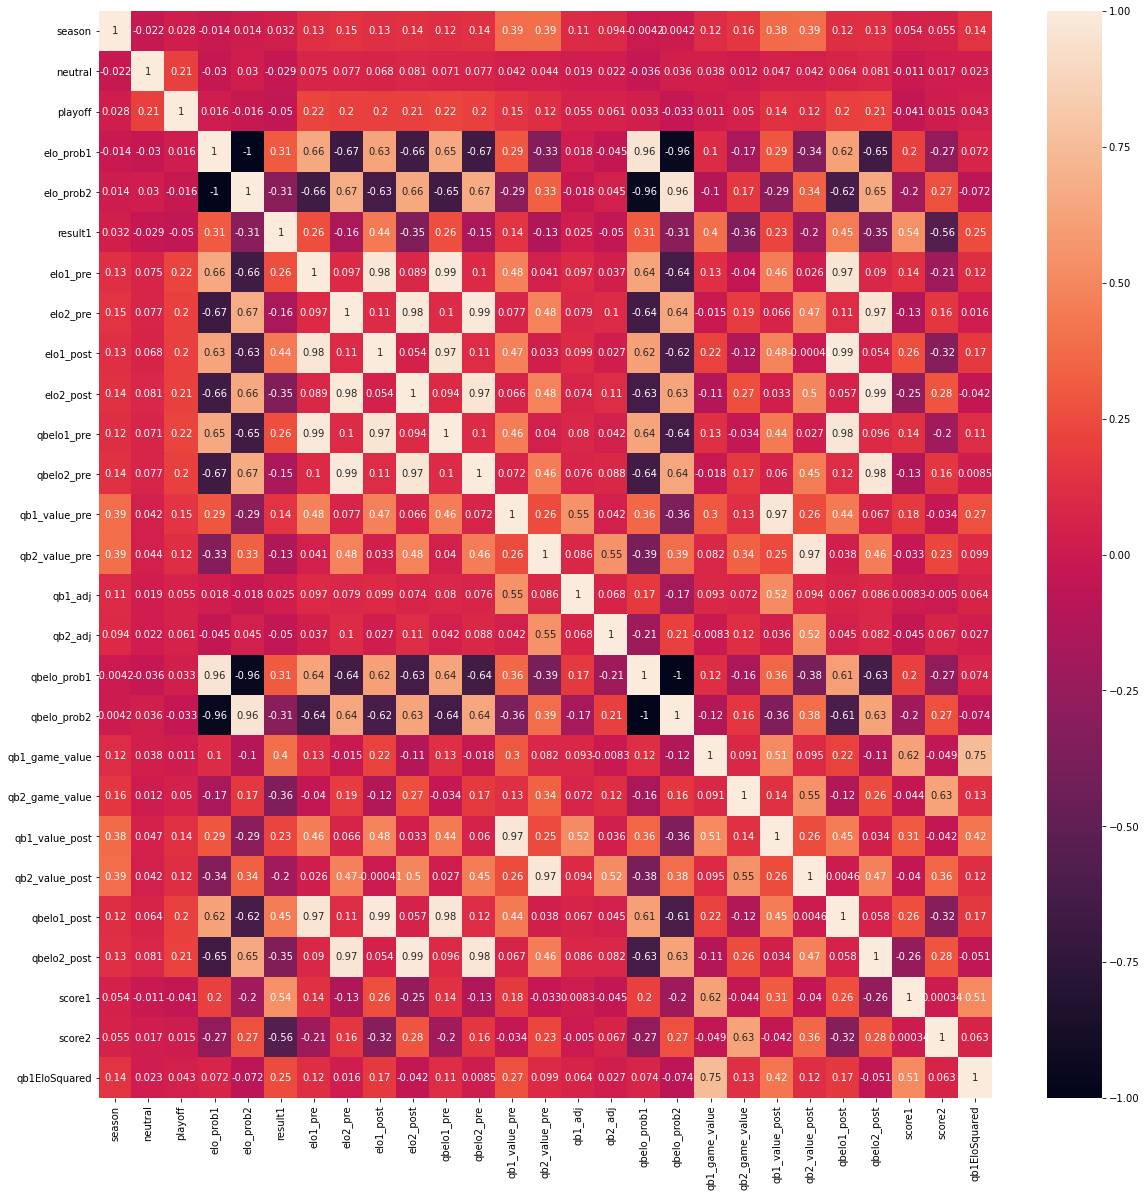

In [159]:
plt.subplots(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True)
plt.show()

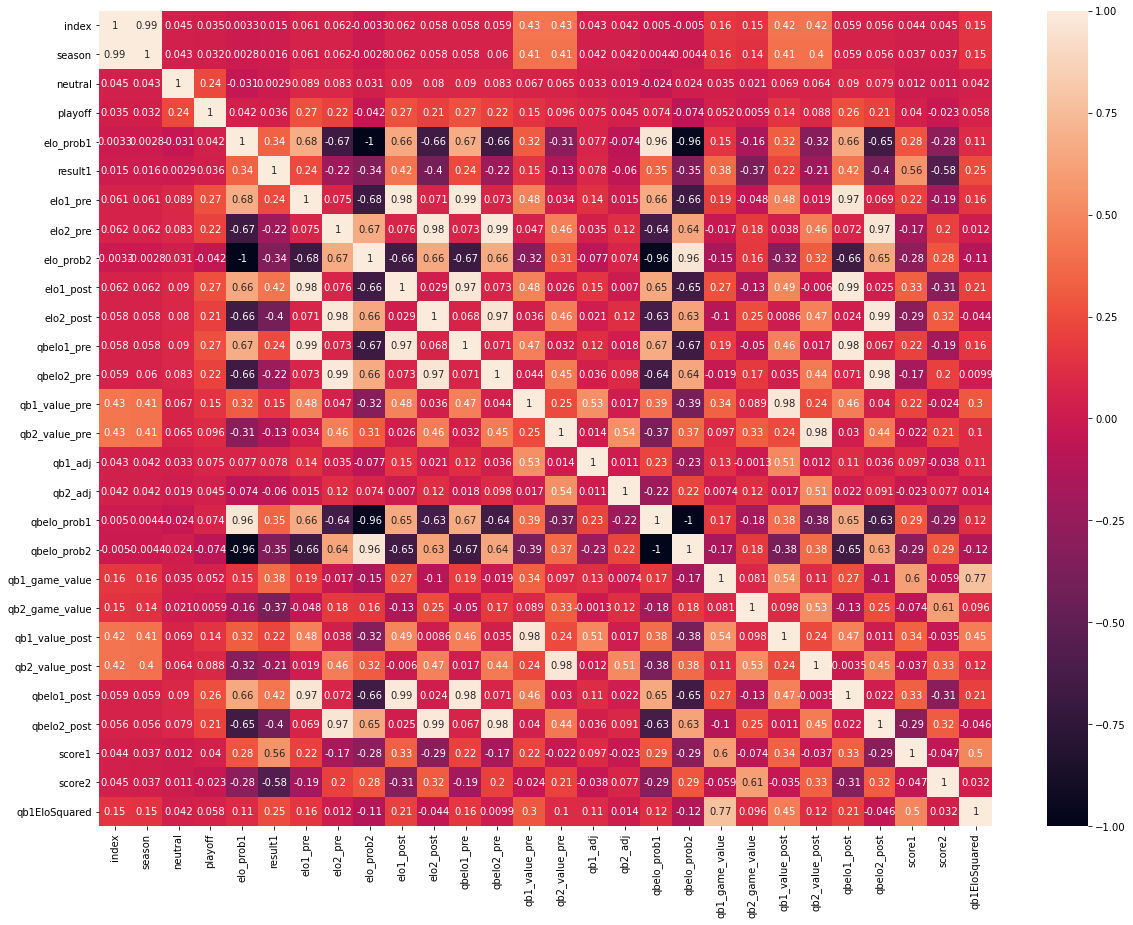

In [160]:
corrMatrix = dfAll.corr()
plt.subplots(figsize=(20,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

I would like to further explore the potential independent variables to see if there are any visible trends in their values.

The first 4 plots are for the KC dataset and the 5th plot is for all the data.

First, I plot the qb1_game_value against score1 below. There is a general upward trend in the plot: as the QB adjusted Elo rating increases, the expected score of that team increases. This makes sense. The higher that Elo rating, the greater the chance the team will win, which corresponds to a higher game score.

The second plot is the same data plotted with lmplot which adds a fitted line to the data. We can see again there is a general trendline observed in the data.

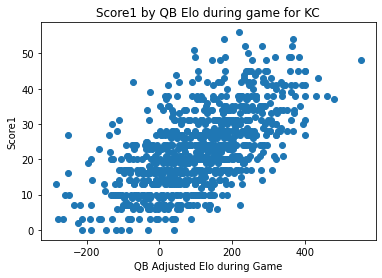

In [161]:
plt.scatter(dfKC['qb1_game_value'], dfKC['score1'])
plt.title('Score1 by QB Elo during game for KC')
plt.ylabel('Score1')
plt.xlabel('QB Adjusted Elo during Game')
plt.show()

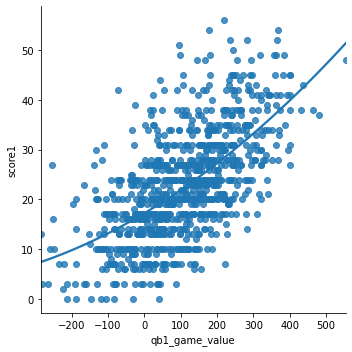

In [162]:
sn.lmplot(x="qb1_game_value", y="score1", data=dfKC, order=2, ci=None)

I do the same analysis for Score2 and the results are similar with an upward trend. This is expected since score1 and score2 are simply the scores for team1 and team2. Even though team2 respresents the away team, their chances of winning are still the same as the home team and equally determined by the QB adjusted Elo rating.

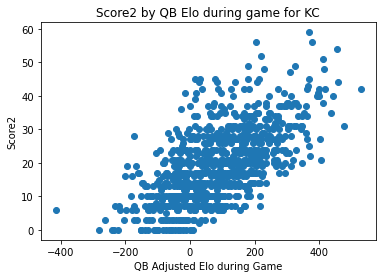

In [163]:
plt.scatter(dfKC['qb2_game_value'], dfKC['score2'])
plt.title('Score2 by QB Elo during game for KC')
plt.ylabel('Score2')
plt.xlabel('QB Adjusted Elo during Game')
plt.show()

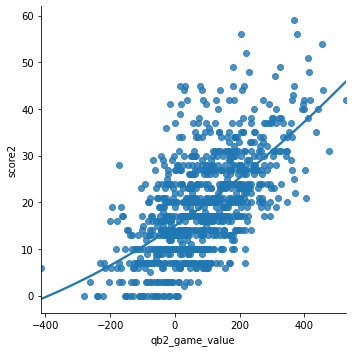

In [164]:
sn.lmplot(x="qb2_game_value", y="score2", data=dfKC, order=2, ci=None)

The last plot is for all the data. I plot score1 against the QB adjusted Elo rating for all teams to see the relationship and trendline. Although the results are muddier, it looks very similar to the KC datasets. There is a clear upward trend using lmplot.

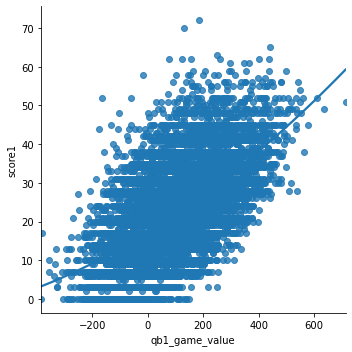

In [165]:
sn.lmplot(x="qb1_game_value", y="score1", data=dfAll, order=2, ci=None)

Overall, the QB adjusted Elo Ratings appear to be good choices for independent variables. When combined with other independent variables, we will see how much it can explain the variation in score.

## Regression Analysis

### KC Data
First I run regressions with a single independent variable on the KC dataset. 

Below I run the linear regression model on score1 with qb1_game_value as the independent variable. The resulting R-squared, intercept, and coefficient are printed.

The R squared value for this regression is 0.38 which means 38% of the variation in score1 can be explained by qb1_game_value. As the value of R-squared gets closer to 1, the more accurate our model is. This R-squared value of 0.38 is not great. But since this is a linear regression, we can't expect much in terms of explanatory power from a straight line.

The intercept and coefficient are also printed. These values are used to predict the score value. In other words, if our equation is y=mx+b, with all the values plugged in we have score1=(0.050)qb_game_value + 17.43

The fitted line determined by the regression is plotted below. As expected we see an upward trending line in the data. 

In [166]:
X=np.array(dfKC['qb1_game_value']).reshape(-1,1)
y=np.array(dfKC['score1']).reshape(-1,1)
model=linear_model.LinearRegression()
model.fit(X, y)
print('R squared:', model.score(X, y)) # R squared
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

R squared: 0.3834128464801818
Intercept: [17.4368671]
Coefficient: [[0.05039949]]


<function matplotlib.pyplot.show(*args, **kw)>

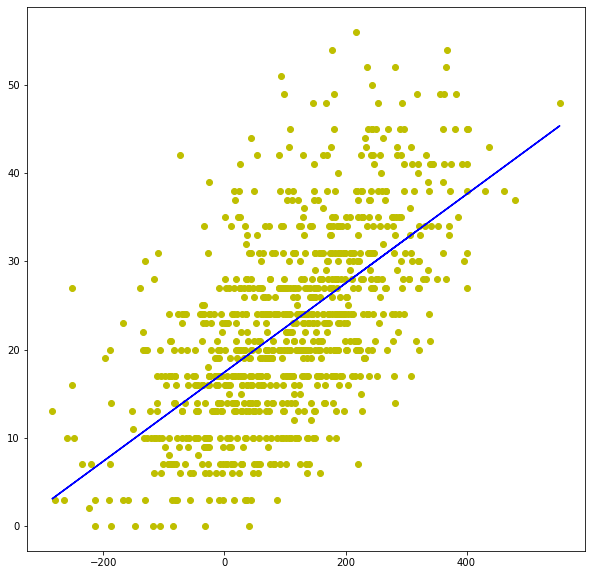

In [167]:
y_pred = model.predict(X)
plt.figure(figsize=(10,10))
plt.scatter(X, y, color='y')
plt.plot(X, y_pred, color='b')

plt.show

Next I choose to use the Random Forest regression to compare the results to OLS. I choose to use 1000 decision trees so that the results are more robust. The results are plotted below. Again there is an upward trend in the fitted line; however the random forest predictions do not simply lie on a straight line (as they did in OLS). This regression seems to more accurately predict the score when compared to OLS simply because the variation in the regression line seems more realistic. 

In [168]:
regressor=RandomForestRegressor(n_estimators=1000, random_state=0)
X=np.array(dfKC['qb1_game_value']).reshape(-1,1)
y=np.array(dfKC['score1']).reshape(-1,1)
regressor.fit(X, y.ravel())

RandomForestRegressor(n_estimators=1000, random_state=0)

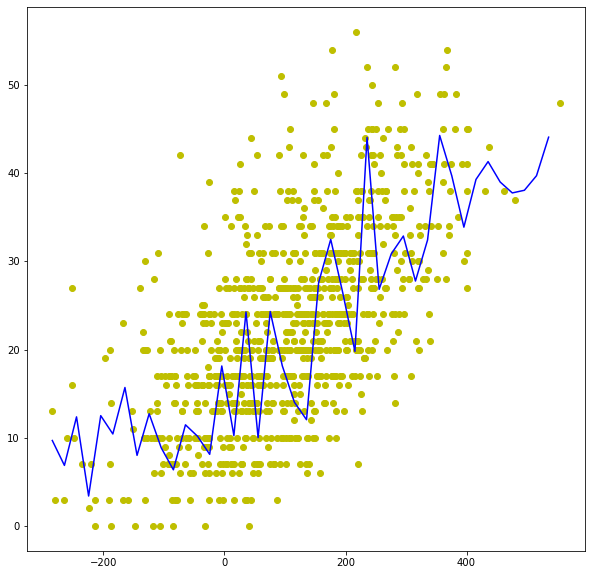

In [169]:
X_grid=np.arange(min(X), max(X), 20)
X_grid=X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(10,10))
plt.scatter(X, y, color='y')
plt.plot(X_grid, regressor.predict(X_grid), color='b')
plt.show()

I also run the random forest regression on the score2 target value. The results are similar to the random forest results for score1. The regression line looks smoother here because I plotted fewer fitted datapoints here. In the score1 regression I used 20 as my parameter and here I used 50. 

In [170]:
regressor=RandomForestRegressor(n_estimators=1000, random_state=0)
X=np.array(dfKC['qb2_game_value']).reshape(-1,1)
y=np.array(dfKC['score2']).reshape(-1,1)
regressor.fit(X, y.ravel())

RandomForestRegressor(n_estimators=1000, random_state=0)

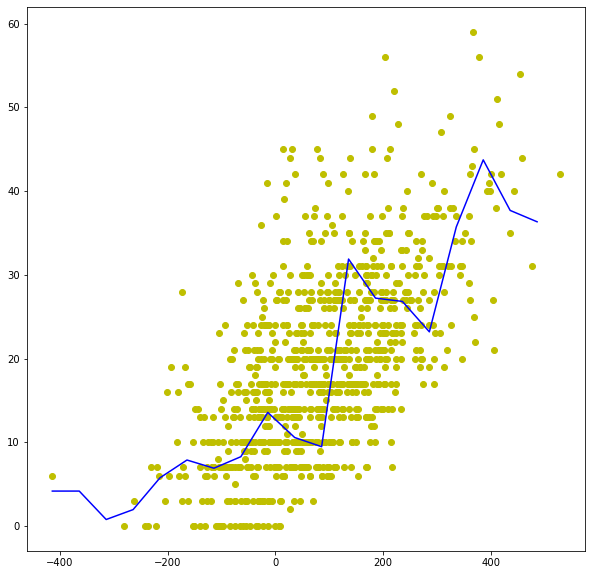

In [171]:
X_grid=np.arange(min(X), max(X), 50)
X_grid=X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(10,10))
plt.scatter(X, y, color='y')
plt.plot(X_grid, regressor.predict(X_grid), color='b')
plt.show()

### All Data

The results for the score1 regressions using gb1_game_value as the independent variable can be seen below. I ran both OLS and random forest regressions. The results look very similar to the results for the KC dataset. Therefore it can be inferred that the effect of the Elo ratings on the expected scores is very similar if not the same across NFL teams.

In [172]:
X=np.array(dfAll['qb1_game_value']).reshape(-1,1)
y=np.array(dfAll['score1']).reshape(-1,1)
model=linear_model.LinearRegression()
model.fit(X, y)
print('R squared:', model.score(X, y)) # R squared
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

R squared: 0.3623280643932135
Intercept: [17.30152885]
Coefficient: [[0.04887566]]


<function matplotlib.pyplot.show(*args, **kw)>

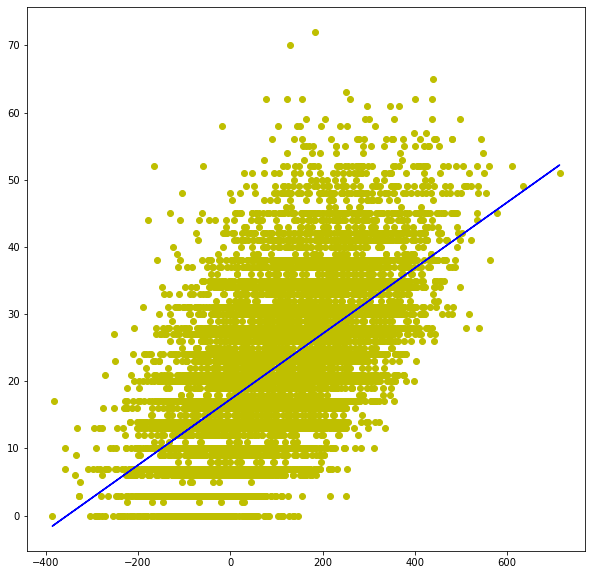

In [173]:
y_pred = model.predict(X)
plt.figure(figsize=(10,10))
plt.scatter(X, y, color='y')
plt.plot(X, y_pred, color='b')

plt.show

In [ ]:
regressor=RandomForestRegressor(n_estimators=1000, random_state=0)
X=np.array(dfAll['qb1_game_value']).reshape(-1,1)
y=np.array(dfAll['score1']).reshape(-1,1)
regressor.fit(X, y.ravel())

In [ ]:
X_grid=np.arange(min(X), max(X), 50)
X_grid=X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(10,10))
plt.scatter(X, y, color='y')
plt.plot(X_grid, regressor.predict(X_grid), color='b')
plt.show()

### Adding more independent variables to the linear regression model to improve fit

In order to make the OLS regression model more robust, I try to add more independent variables to the OLS model. Since I added more variables I am now unable to plot a fitted line, but we can still analyze the results based on the R-squared term. Since team1 and team2 results are very similar, I play around with the score1 regressions only.

Instead of running a kitchen sink regression, I choose a few variables that I expect to affect the score of the team. Along with the QB adjusted Elo rating, I expect the Result, Pre-game Elo rating, neutral field, and whether it's a playoff game to affect the team's score. After running this regression, I can see that the R-squared term is now larger, which makes it seem like this regression is a better fit for the data. The variation in my independent variables explains the variation in my target variable. Let's take out some of these independent variables to determine the true effects.

In [ ]:
feature_cols = ['qb1_game_value', 'result1', 'elo1_pre', 'neutral', 'playoff']
X = dfKC[feature_cols] # Features
#X=np.array(dfKC['qb1_game_value']).reshape(-1,1)
y=np.array(dfKC['score1']).reshape(-1,1)
model=linear_model.LinearRegression()
model.fit(X, y)
print('R squared:', model.score(X, y)) # R squared
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

To see the effect of the Result variable on score, I run a regression with only the result. The R-squared term (0.29) is smaller than the one we got from the QB adjusted Elo Rating regression (0.38). So let's try to combine the two to see the results.

In [ ]:
feature_cols = ['result1']
X = dfKC[feature_cols] # Features
#X=np.array(dfKC['qb1_game_value']).reshape(-1,1)
y=np.array(dfKC['score1']).reshape(-1,1)
model=linear_model.LinearRegression()
model.fit(X, y)
print('R squared:', model.score(X, y)) # R squared
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

After adding the Result, we get an R-squared term that's about the same as our regression results that had many more independent variables included. We can therefore conclude that the majority of explanatory power came from the QB adjusted Elo rating and the Result variables. 

In [ ]:
feature_cols = ['qb1_game_value', 'result1']
X = dfKC[feature_cols] # Features
#X=np.array(dfKC['qb1_game_value']).reshape(-1,1)
y=np.array(dfKC['score1']).reshape(-1,1)
model=linear_model.LinearRegression()
model.fit(X, y)
print('R squared:', model.score(X, y)) # R squared
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

The last OLS regression I want to try is to add in the QB Adjusted Elo Squared term to see if this affects our results. It turns out the QB Adjusted Elo Squared term doesn't have much explanatory power, because our R-squared value didn't increase significantly.

In [ ]:
feature_cols = ['qb1_game_value', 'result1', 'qb1EloSquared']
X = dfKC[feature_cols] # Features
#X=np.array(dfKC['qb1_game_value']).reshape(-1,1)
y=np.array(dfKC['score1']).reshape(-1,1)
model=linear_model.LinearRegression()
model.fit(X, y)
print('R squared:', model.score(X, y)) # R squared
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

# Conclusion

I used the Linear Regression and Random Forest models to predict the score of a team for a given game.  Since there are 2 score variables--score1 for team1 and score2 for team2--regressions are run separately where each score1 and score2 serve as the target variable. Since all the teams switch between being team1 and team2, the results for these regressions are similar. Even though team2 respresents the away team, their chances of winning still the same as the home team and equally determined by the QB adjusted Elo rating. We know this because the neutral playing field variable did not have any explanatory power over the score according to our regression models.

I used a correlation heatmap to determine the best predictors of score and then ran Linear and Random Forest regressions. The best linear regressions produced an R^2 of 0.48 and 0.49 meaning 48%-49% of the variation in score (dependent variable) could be explained by the features (independent variables) I chose. The most important features were the QB adjusted Elo Rating and the Result variable. This makes sense, because as seen in the scatter plots we expect an increased Elo Rating of any kind to correspond with a higher team score and vice versa. And if a team has a history of winning more games in the case of the Result variable, we expect them to have a higher score as well. 

Overall, the Random Forest regression visually appeared to explain more variation than the linear regression, which is expected because the random forest predictions are not required to follow a straight line.